# Weighted SigClust

In [10]:
import sigclust
import numpy as np
np.random.seed(824)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
toy = pd.read_csv('examples/sigclust_toy_data.csv', header=None)
toy = toy.T
toy.columns = ['label', 'x1', 'x2']

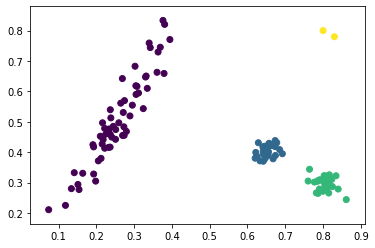

In [12]:
plt.scatter(toy['x1'], toy['x2'], c=toy['label'])

### Regular SigClust: Long gaussian versus outliers

In [13]:
long_gaussian_and_outliers = toy[toy['label'].isin([1,4])]

In [14]:
sc = sigclust.SigClust()
sc.fit(long_gaussian_and_outliers[['x1', 'x2']], long_gaussian_and_outliers['label'])
print(f"p-value: {sc.p_value} \nz-score: {sc.z_score}")

p-value: 1.0 
z-score: 6.621304975716945


Text(0.5, 1.0, 'Regular SigClust')

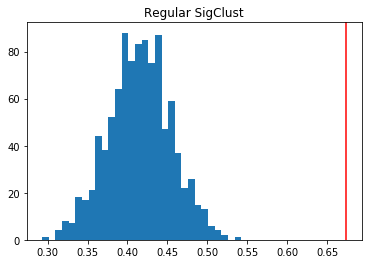

In [15]:
plt.hist(sc.simulated_cluster_indices, bins=30)
plt.axvline(sc.sample_cluster_index, color='red')
plt.title("Regular SigClust")

### Weighted SigClust (conservative): long gaussian versus outliers
Conservative means that each MVN sample will be twice the size of the majority class ($2 n_{maj}$), instead of $n_{min} + n_{maj}$. The conservative behavior replicates what would happen if you replicated the points of the minority class enough times to match the size of the majority class.

In [16]:
wsc_c = sigclust.WeightedSigClust(conservative=True)
wsc_c.fit(long_gaussian_and_outliers[['x1', 'x2']], long_gaussian_and_outliers['label'])

In [17]:
print(f"p-value: {wsc_c.p_value} \nz-score: {wsc_c.z_score}")

p-value: 0.0 
z-score: -6.291436033504205


Text(0.5, 1.0, 'Weighted SigClust (conservative)')

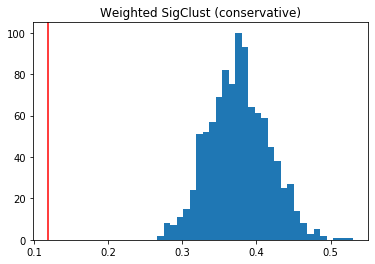

In [18]:
plt.hist(wsc_c.simulated_cluster_indices, bins=30)
plt.axvline(wsc_c.sample_cluster_index, color='red')
plt.title("Weighted SigClust (conservative)")

### Weighted SigClust (nonconservative): long gaussian versus outliers
Not using the `conservative=True` option means that the number of points in each MVN sample will match the number of points in the data, rather than twice the size of the majority class.

In [19]:
wsc = sigclust.WeightedSigClust()
wsc.fit(long_gaussian_and_outliers[['x1', 'x2']], long_gaussian_and_outliers['label'])

In [20]:
print(f"p-value: {wsc.p_value} \nz-score: {wsc.z_score}")

p-value: 0.0 
z-score: -9.140289424942155


Text(0.5, 1.0, 'Weighted SigClust (nonconservative)')

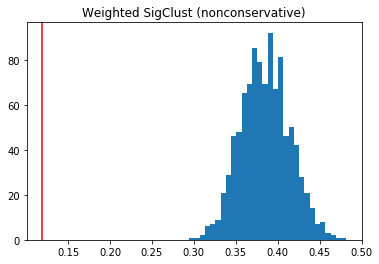

In [21]:
plt.hist(wsc.simulated_cluster_indices, bins=30)
plt.axvline(wsc.sample_cluster_index, color='red')
plt.title("Weighted SigClust (nonconservative)")

### Notes:
* Classical SigClust does not detect the split
* Both versions of WeightedSigClust do detect it, and the conservative one has a more conservative z-score, as it should.